## 作業:
今天學到五種分配，包含，   
離散均勻分配( Discrete Uniform Distribution )   
伯努利分配( Bernoulli Distribution )   
二項分配(Binomial Distribution)  
負二項分配(Negative Binomial Distribution)  
超幾何分配(Hypergeometric Distribution)   
今天我們透過作業中的問題，回想今天的內容吧!  

### Q1: 大樂透的頭獎，你必須從49個挑選出 6 個號碼，
### 且這六個號碼與頭獎的六個號碼一致，頭獎的機率是屬於哪一種分配?

In [ ]:
超幾何分配

### Q2: 運用範例的 python 程式碼，計算大樂透的中頭獎機率?

In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics

[0 1 2 3 4 5 6]
[4.35964976e-01 4.13019450e-01 1.32378029e-01 1.76504039e-02
 9.68619724e-04 1.84498995e-05 7.15112384e-08]
六碼全中機率: 7.151123842018523e-08
<class 'numpy.ndarray'>


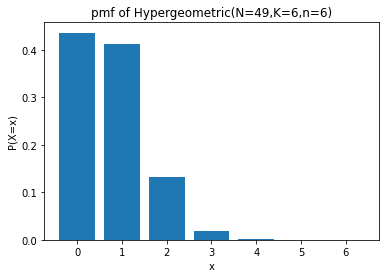

In [6]:
'''
超幾何分配(Hypergeometric Distribution)描述了
由有限個物件中抽出n個物件，成功抽出指定種類的物件的個數（不歸還 （without replacement）)
若隨機變量X 服從參數，則記為  H(n,K,N)，
𝑁 : 共有幾個物件, 𝑁 =49
𝐾 : 𝑁 個物件中，有 𝐾 個是你關心的物件類型個數, 𝐾 =0,1,2,…, 𝑁  K=6
𝑛 : K個物件，要抽出 𝑛 個物件, 𝑛 =0,1,…, n=6

現在有兩堆數字，43個為沒中獎數字，6個為中獎數字，取出6個，X=有幾個是中獎的。
'''
# 1.定義超幾何分配的基本資訊
N=49
K=6
n=6

#產生一個同樣間隔的序列
r = np.arange(0, min(n+1,K+1)) #產出 x 對應點
print(r)

# # 2.計算機率質量函數 (probability mass function)
# # P(X=x) --> 是機率
probs = stats.hypergeom.pmf(r, N,K,n)
print(probs)
print('六碼全中機率:', probs[6])
print(type(probs))

plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('pmf of Hypergeometric(N=49,K=6,n=6)')
plt.show()

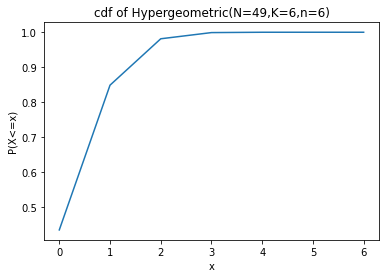

In [5]:
# 3.計算超幾何分配的累積機率 (cumulative density function)，pmf 的累加
# P(X=x) --> 是機率
cumsum_probs = stats.hypergeom.cdf(r, N,K,n)
plt.show()
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('cdf of Hypergeometric(N=49,K=6,n=6)')
plt.plot(r, cumsum_probs)
plt.show()

In [11]:
# 4.透過 cdf ，給定一個 機率值，反推出對應到的 x
p_loc= stats.hypergeom.ppf(7.151123842018523e-08, N,K,n)
print(p_loc)
#看上圖看結果

0.0


[1 0 0 ... 0 2 2]


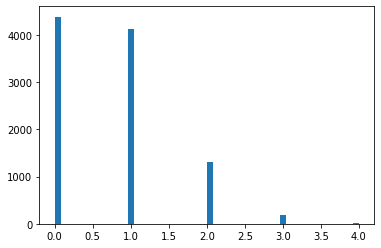

In [12]:
# 5.產生符合超幾何分配的隨機樣本點 (random sample)
X = stats.hypergeom.rvs(N,K,n,size=10000)
print(X)
plt.hist(X,bins=50)
plt.show()
#試試看，，每一次的結果一樣嗎?

In [13]:
#6.計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。

stat_hyperg=stats.hypergeom.stats(N,K,n,moments='mvks')
print(stat_hyperg)
print(type(stat_hyperg))
#E(X)
print("negative hypergeom mean=",float(stat_hyperg[0]))
print("negative hypergeom variance=",float(stat_hyperg[1]))
print("negative hypergeom kurtosis=",float(stat_hyperg[2]))
print("negative hypergeom skew=",float(stat_hyperg[3]))



(array(0.73469388), array(0.57757185), array(0.78217963), array(0.14594099))
<class 'tuple'>
negative hypergeom mean= 0.7346938775510203
negative hypergeom variance= 0.5775718450645564
negative hypergeom kurtosis= 0.7821796323806014
negative hypergeom skew= 0.1459409933480724


### Q3: 你覺得電腦簽注的中獎機率，和人腦簽注相比，哪一個機率高?

In [ ]:
一樣高